In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import re



In [6]:
def set_shared_ylabel(a, ylabel, labelpad = 0.01):
    """Set a y label shared by multiple axes
    Parameters
    ----------
    a: list of axes
    ylabel: string
    labelpad: float
        Sets the padding between ticklabels and axis label"""

    f = a[0].get_figure()
    f.canvas.draw() #sets f.canvas.renderer needed below

    # get the center position for all plots
    top = a[0].get_position().y1
    bottom = a[-1].get_position().y0

    # get the coordinates of the left side of the tick labels 
    x0 = 1
    for at in a:
        at.set_ylabel('') # just to make sure we don't and up with multiple labels
        bboxes, _ = at.yaxis.get_ticklabel_extents(f.canvas.renderer)
        bboxes = bboxes.inverse_transformed(f.transFigure)
        xt = bboxes.x0
        if xt < x0:
            x0 = xt
    tick_label_left = x0

    # set position of label
    a[-1].set_ylabel(ylabel,fontsize=32)
    a[-1].yaxis.set_label_coords(tick_label_left - labelpad,(bottom + top)/2, transform=f.transFigure)


### Create Bar Plots for Small Systems

In [17]:
# set height of bar
coh2_simul_diis = np.array([0.393640263,0.411130391,0.489976446,0.46856615])  
coh2_stw_diis = np.array([1,1,1,1])

# set height of bar
hcn_simul_diis = np.array([0.637636081,0.840163934,0.658122905,0.710299167])
hcn_stw_diis = np.array([1,1,1,1])

# set height of bar
fhf_simul_diis = np.array([0.837837838,0.905225015,0.872822977,0.569420327])
fhf_stw_diis = np.array([1,1,1,1])

In [18]:
# set width of bar
barWidth = 0.15

# Set position of bar on X axis
br1 = np.arange(len(coh2_simul_diis))
#br3 = [x + barWidth for x in br1]

basis_set_labels = ['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d']
basis_set_labels_multiline = [re.sub("(.{8})", "\\1\n", label, 0, re.DOTALL) for label in basis_set_labels]

<ipython-input-6-a42e863b7122>:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.canvas.draw() #sets f.canvas.renderer needed below
<ipython-input-6-a42e863b7122>:22: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bboxes = bboxes.inverse_transformed(f.transFigure)
<ipython-input-21-290ce02b8656>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('small_system_2AlgvsCompCost_new.pdf',dpi=3600)
<ipython-input-21-290ce02b8656>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('small_system_2AlgvsCompCost_new.pdf',dpi=3600)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figu

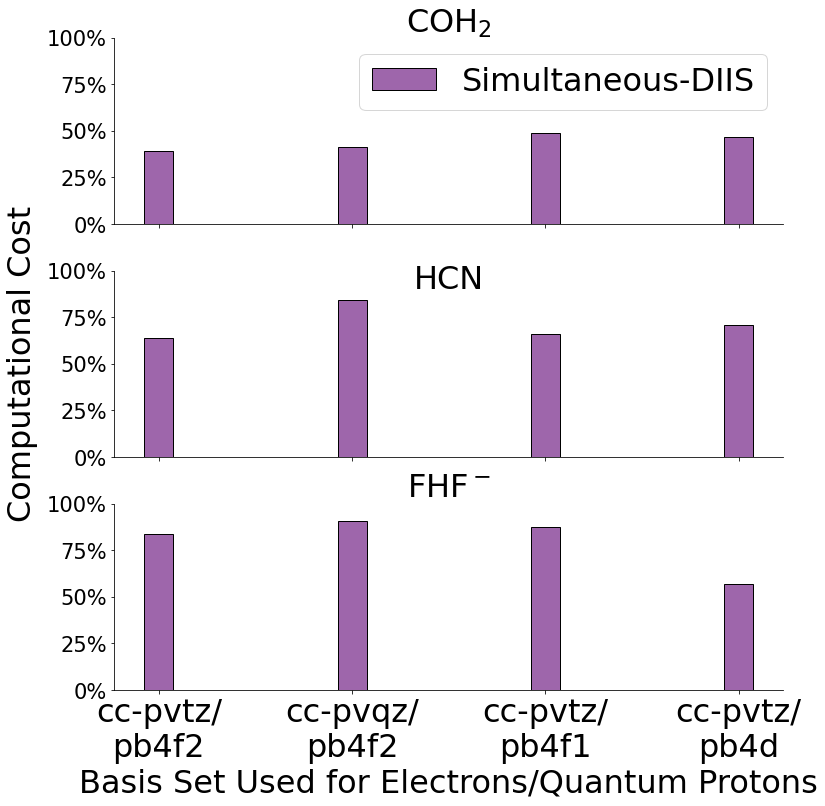

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize =(12, 12), sharex=True, sharey='row', gridspec_kw={'hspace': 0.25},tight_layout=True)
# fig = plt.figure(figsize =(16, 8),tight_layout=True)
# ax1 = fig.add_subplot(311)
# ax2 = fig.add_subplot(312)
# ax3 = fig.add_subplot(313)


# ax1.bar(br1, coh2_stw_diis, color ='#9e66ab', width = barWidth,
#         edgecolor ='black', label ='Stepwise-DIIS')
# ax1.bar(br3, coh2_simul_diis, color ='darkorange', width = barWidth,
#         edgecolor ='black', label ='Simulaneous-DIIS')\
ax1.bar(br1, coh2_simul_diis, color ='#9e66ab', width = barWidth,
        edgecolor ='black', label ='Simultaneous-DIIS')
ax1.legend(loc='upper right', fontsize=32)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='y', labelsize=21)
ax1.set_ylim(0,1)
ax1.set_yticks(np.arange(0,1.25,0.25))
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1))

# ax1.set_xticks([r + barWidth for r in range(len(coh2_simul_diis))])
# ax1.set_xticklabels(['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'],fontsize=8)



#ax2.bar(br1, hcn_stw_diis, color ='#9e66ab', width = barWidth,
#        edgecolor ='black', label ='STW-DIIS')
#ax2.bar(br3, hcn_simul_diis, color ='darkorange', width = barWidth,
#        edgecolor ='black', label ='Simul-DIIS')
ax2.bar(br1, hcn_simul_diis, color ='#9e66ab', width = barWidth,
        edgecolor ='black', label ='Simultaneous-DIIS')
# ax2.set_xticks([r + barWidth for r in range(len(coh2_simul_diis))])
# ax2.set_xticklabels(['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'],fontsize=8)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='y', labelsize=21)
ax2.set_ylim(0,1)
ax2.set_yticks(np.arange(0,1.25,0.25))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))

#ax3.bar(br1, fhf_stw_diis, color ='#9e66ab', width = barWidth,
#        edgecolor ='black', label ='Stepwise-DIIS')
#ax3.bar(br3, fhf_simul_diis, color ='darkorange', width = barWidth,
#        edgecolor ='black', label ='Simultaneous-DIIS')
ax3.bar(br1, fhf_simul_diis, color ='#9e66ab', width = barWidth,
        edgecolor ='black', label ='Simultaneous-DIIS')
ax3.set_xticks([r for r in range(len(coh2_simul_diis))])
ax3.set_xticklabels(basis_set_labels_multiline,fontsize=32)
#ax3.set_yticks(np.arange(0, max(fhf_simul_nodiis)+1, 2))
ax3.tick_params(axis='y', labelsize=21)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_ylim(0,1)
ax3.set_yticks(np.arange(0,1.25,0.25))
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1))

ax1.set_title('COH$_2$', fontsize=32,verticalalignment='baseline')
ax2.set_title('HCN', fontsize=32,verticalalignment='top')
ax3.set_title('FHF$^-$', fontsize=32,verticalalignment='top')


plt.xlabel("Basis Set Used for Electrons/Quantum Protons",fontsize=32)
set_shared_ylabel((ax1, ax2, ax3), 'Computational Cost')
#fig.tight_layout()


plt.savefig('small_system_2AlgvsCompCost_new.pdf',dpi=3600)
plt.show()


### Create Bar Plots for Protonated Water Tetramer

In [22]:
# set height of bar
TetraH2O_simul_diis = np.array([0.776323688,0.746323688,0.734561231,0.756323688])  
TetraH2O_simul_nodiis = np.array([2.470596322,2.374006457,2.415777295,2.456789079])  
TetraH2O_stw_diis = np.array([1,1,1,1])

In [23]:
# set width of bar
barWidth = 0.15

# Set position of bar on X axis
br1 = np.arange(len(TetraH2O_simul_diis))

br3 = [x + barWidth for x in br1]

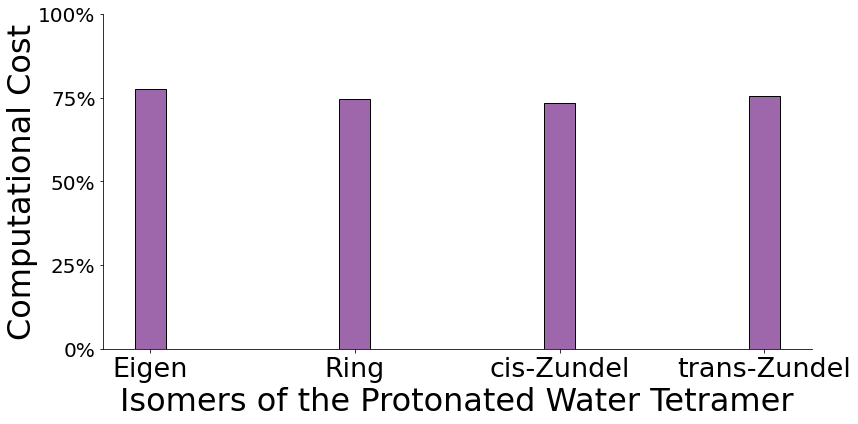

In [42]:
fig, ax = plt.subplots(figsize =(12, 6))
 
# Make the plot

# plt.bar(br1, TetraH2O_stw_diis, color ='#9e66ab', width = barWidth,
#         edgecolor ='black', label ='Stepwise-DIIS')


# plt.bar(br3, TetraH2O_simul_diis, color ='darkorange', width = barWidth,
#         edgecolor ='black', label ='Simultaneous-DIIS')

plt.bar(br1, TetraH2O_simul_diis, color ='#9e66ab', width = barWidth,
        edgecolor ='black', label ='Simultaneous-DIIS')

# Adding Xticks
plt.xlabel('Basis Sets')
plt.ylabel('# of Fock Builds')
plt.xticks([r for r in range(len(TetraH2O_simul_diis))],
        ['Eigen', 'Ring', 'cis-Zundel', 'trans-Zundel'],fontsize=27)

#plt.legend(loc='upper right',fontsize=32)
plt.xlabel("Isomers of the Protonated Water Tetramer",fontsize=32)
plt.ylabel("Computational Cost",fontsize=32,labelpad = 0.01)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().set_ylim(0,1)
plt.gca().set_yticks(np.arange(0,1.25,0.25))
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
fig.tight_layout()
plt.savefig('4H2O_2AlgvsCompCost_new.pdf',dpi=3600)
plt.show()

In [35]:
# Average Saving for the 4H2O+
np.average(TetraH2O_simul_diis)

0.75338307375

In [10]:
# Average Saving for the Small System
np.average(np.concatenate((coh2_simul_diis,hcn_simul_diis,fhf_simul_diis)),axis=None)

0.23422158266666668

In [11]:
1-0.164312378

0.835687622

### Create Bar Plots for Small Systems (DIIS vs NO DIIS)

In [12]:
coh2_stw_nodiis = np.array([1,1,1,1])
coh2_stw_diis = np.array([0.369339324,0.232514899,0.352781857,0.3222626871])

hcn_stw_nodiis = np.array([1,1,1,1])
hcn_stw_diis = np.array([0.317159976,0.270548313,0.314655822,0.275008674])

fhf_stw_nodiis = np.array([1,1,1,1])
fhf_stw_diis = np.array([0.403336943,0.364739614,0.388835928,0.281778739])

In [13]:
# set width of bar
barWidth = 0.1

# Set position of bar on X axis
br1 = np.arange(len(coh2_stw_diis))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

<ipython-input-2-9ecaabd21506>:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.canvas.draw() #sets f.canvas.renderer needed below
<ipython-input-2-9ecaabd21506>:22: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bboxes = bboxes.inverse_transformed(f.transFigure)
<ipython-input-14-bfabd26a0266>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('small_system_AlgvsCompCost_StwDIISvsStwNoDIIS.pdf',dpi=600)
<ipython-input-14-bfabd26a0266>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('small_system_AlgvsCompCost_StwDIISvsStwNoDIIS.pdf',dpi=600)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:1

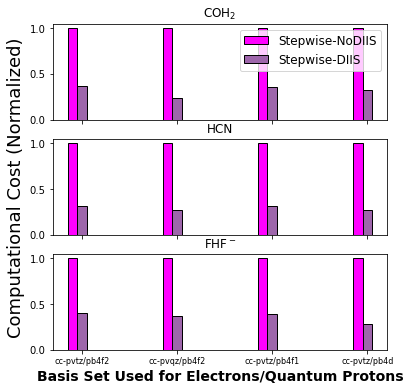

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize =(6, 6), sharex=True, sharey='row', gridspec_kw={'hspace': 0.2},tight_layout=True)
# fig = plt.figure(figsize =(16, 8),tight_layout=True)
# ax1 = fig.add_subplot(311)
# ax2 = fig.add_subplot(312)
# ax3 = fig.add_subplot(313)


ax1.bar(br1, coh2_stw_nodiis, color ='magenta', width = barWidth,
        edgecolor ='black', label ='Stepwise-NoDIIS')
ax1.bar(br2, coh2_stw_diis, color ='#9e66ab', width = barWidth,
        edgecolor ='black', label ='Stepwise-DIIS')
ax1.legend(loc='upper right', fontsize=12)


ax2.bar(br1, hcn_stw_nodiis, color ='magenta', width = barWidth,
        edgecolor ='black', label ='Stepwise-NoDIIS')
ax2.bar(br2, hcn_stw_diis, color ='#9e66ab', width = barWidth,
        edgecolor ='black', label ='Stepwise-DIIS')


ax3.bar(br1, fhf_stw_nodiis, color ='magenta', width = barWidth,
        edgecolor ='black', label ='Stepwise-NoDIIS')
ax3.bar(br2, fhf_stw_diis, color ='#9e66ab', width = barWidth,
        edgecolor ='black', label ='Stepwise-DIIS')

ax3.set_xticks([r + barWidth for r in range(len(coh2_stw_diis))])
ax3.set_xticklabels(['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'],fontsize=8)
#ax3.set_yticks(np.arange(0, max(fhf_simul_nodiis)+1, 2))

ax1.title.set_text('COH$_2$')
ax2.title.set_text('HCN')
ax3.title.set_text('FHF$^-$')


plt.xlabel("Basis Set Used for Electrons/Quantum Protons", fontsize=14,fontweight='bold')
set_shared_ylabel((ax1, ax2, ax3), 'Computational Cost (Normalized)')


plt.savefig('small_system_AlgvsCompCost_StwDIISvsStwNoDIIS.pdf',dpi=600)
plt.show()

In [15]:
def normalize1DArray(a,b):
    c = np.zeros(len(b))
    d = np.ones(len(b))
    for i in range(len(b)):
        c[i] = a[i] / b[i]
    return c,d
    

In [16]:
# set height of bar
coh2_simul_diis = np.array([0.073596072,0.182056733,0.10770202,0.139372822])  
coh2_simul_nodiis = np.array([1.618568438,4.555271374,2.205019348,2.905923345])  
coh2_simul_diis_norm,coh2_simul_nodiis_norm = normalize1DArray(coh2_simul_diis,coh2_simul_nodiis)

# set height of bar
hcn_simul_diis = np.array([0.162015133,0.337121743,0.200898033,0.258566851])
hcn_simul_nodiis = np.array([3.277373915,9.076601593,4.811607337,6.850741523])
hcn_simul_diis_norm,hcn_simul_nodiis_norm = normalize1DArray(hcn_simul_diis,hcn_simul_nodiis)

# set height of bar
fhf_simul_diis = np.array([0.259174223,0.919942565,0.415527326,0.590399957])
fhf_simul_nodiis = np.array([5.399462972,13.32737305,7.233952986,10.79588493])
fhf_simul_diis_norm,fhf_simul_nodiis_norm = normalize1DArray(fhf_simul_diis,fhf_simul_nodiis)

In [17]:
# set width of bar
barWidth = 0.1

# Set position of bar on X axis
br1 = np.arange(len(coh2_simul_diis_norm))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

<ipython-input-2-9ecaabd21506>:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.canvas.draw() #sets f.canvas.renderer needed below
<ipython-input-2-9ecaabd21506>:22: MatplotlibDeprecationWarning: 
The inverse_transformed function was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use transformed(transform.inverted()) instead.
  bboxes = bboxes.inverse_transformed(f.transFigure)
<ipython-input-18-22506c557ed1>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('small_system_AlgvsCompCost_SmtDIISvsSmtNoDIIS.pdf',dpi=600)
<ipython-input-18-22506c557ed1>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('small_system_AlgvsCompCost_SmtDIISvsSmtNoDIIS.pdf',dpi=600)
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:1

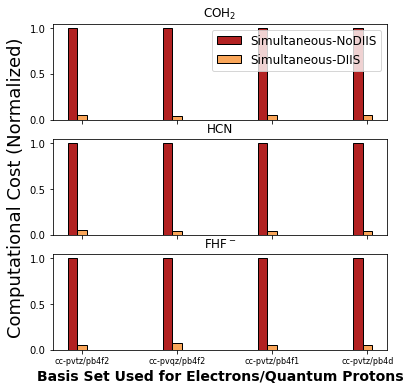

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize =(6, 6), sharex=True, sharey='row', gridspec_kw={'hspace': 0.2},tight_layout=True)
# fig = plt.figure(figsize =(16, 8),tight_layout=True)
# ax1 = fig.add_subplot(311)
# ax2 = fig.add_subplot(312)
# ax3 = fig.add_subplot(313)


ax1.bar(br1, coh2_simul_nodiis_norm, color ='firebrick', width = barWidth,
        edgecolor ='black', label ='Simultaneous-NoDIIS')
ax1.bar(br2, coh2_simul_diis_norm, color ='#f9a65a', width = barWidth,
        edgecolor ='black', label ='Simultaneous-DIIS')
ax1.legend(loc='upper right', fontsize=12)


ax2.bar(br1, hcn_simul_nodiis_norm, color ='firebrick', width = barWidth,
        edgecolor ='black', label ='Simultaneous-NoDIIS')
ax2.bar(br2, hcn_simul_diis_norm, color ='#f9a65a', width = barWidth,
        edgecolor ='black', label ='Simultaneous-DIIS')


ax3.bar(br1, fhf_simul_nodiis_norm, color ='firebrick', width = barWidth,
        edgecolor ='black', label ='Simultaneous-NoDIIS')
ax3.bar(br2, fhf_simul_diis_norm, color ='#f9a65a', width = barWidth,
        edgecolor ='black', label ='SSimultaneous-DIIS')

ax3.set_xticks([r + barWidth for r in range(len(coh2_simul_diis_norm))])
ax3.set_xticklabels(['cc-pvtz/pb4f2', 'cc-pvqz/pb4f2', 'cc-pvtz/pb4f1', 'cc-pvtz/pb4d'],fontsize=8)
#ax3.set_yticks(np.arange(0, max(fhf_simul_nodiis)+1, 2))

ax1.title.set_text('COH$_2$')
ax2.title.set_text('HCN')
ax3.title.set_text('FHF$^-$')


plt.xlabel("Basis Set Used for Electrons/Quantum Protons", fontsize=14,fontweight='bold')
set_shared_ylabel((ax1, ax2, ax3), 'Computational Cost (Normalized)')


plt.savefig('small_system_AlgvsCompCost_SmtDIISvsSmtNoDIIS.pdf',dpi=600)
plt.show()